# Parsing HTML Tables from Websites with `read_html( )`
Using [this](https://pbpython.com/pandas-html-table.html) tutorial from Practical Business Python and the Pandas [documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_html.html)
## I will be parsing S&P 500 Time Series Data from Wikipedia
Article with table linked [here](https://en.wikipedia.org/wiki/S%26P_500).<br>
>The Standard and Poor's 500, or simply the S&P 500, is a weighted capitalization stock market index tracking the stock performance of 500 large companies listed on exchanges in the United States. It is one of the most commonly followed equity indices. As of December 31, 2020, more than $5.4 trillion was invested in assets tied to the performance of the index.

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from unicodedata import normalize

In [5]:
# reading S&P data table from wiki article
url = 'https://en.wikipedia.org/wiki/S%26P_500'

all_data = pd.read_html(url)
all_data

[                                 0  \
 0  S&P 500 Index from 1950 to 2016   
 1                       Foundation   
 2                         Operator   
 3                        Exchanges   
 4                     Constituents   
 5                             Type   
 6                       Market cap   
 7                 Weighting method   
 8                  Related indices   
 9                          Website   
 
                                                   1  
 0                   S&P 500 Index from 1950 to 2016  
 1                    March 4, 1957; 65 years ago[1]  
 2                          S&P Dow Jones Indices[2]  
 3                       NYSENASDAQCboe BZX Exchange  
 4                                            503[2]  
 5                                      Large-cap[2]  
 6         US$36.7 trillion(as of April 29, 2022)[3]  
 7             Free-float capitalization-weighted[4]  
 8                    S&P 1500S&P Global 1200S&P 100  
 9  www.spglobal.co

In [14]:
# getting table
df = all_data[1].iloc[24:52, :]
df

,Year,Change in Index,Total Annual Return Including Dividends,"Value of $1.00 Invested on January 1, 1970",5 Year Annualized Return,10 Year Annualized Return,15 Year Annualized Return,20 Year Annualized Return,25 Year Annualized Return
24,1994,−1.54%,1.32%,$13.51,8.70%,14.38%,14.52%,14.58%,10.98%
25,1995,34.11%,37.58%,$18.59,16.59%,14.88%,14.81%,14.60%,12.22%
26,1996,20.26%,22.96%,$22.86,15.22%,15.29%,16.80%,14.56%,12.55%
27,1997,31.01%,33.36%,$30.48,20.27%,18.05%,17.52%,16.65%,13.07%
28,1998,26.67%,28.58%,$39.19,24.06%,19.21%,17.90%,17.75%,14.94%
29,1999,19.53%,21.04%,$47.44,28.56%,18.21%,18.93%,17.88%,17.25%
30,2000,−10.14%,−9.10%,$43.12,18.33%,17.46%,16.02%,15.68%,15.34%
31,2001,−13.04%,−11.89%,$37.99,10.70%,12.94%,13.74%,15.24%,13.78%
32,2002,−23.37%,−22.10%,$29.60,−0.59%,9.34%,11.48%,12.71%,12.98%
33,2003,26.38%,28.68%,$38.09,−0.57%,11.07%,12.22%,12.98%,13.84%


## Cleanup
- column names and order
- data cleaning and normalization

In [15]:
# looking at column names
df.columns

Index(['Year', 'Change in Index', 'Total Annual Return Including Dividends',
       'Value of $1.00 Invested on January 1, 1970',
       '5 Year Annualized Return', '10 Year Annualized Return',
       '15 Year Annualized Return', '20 Year Annualized Return',
       '25 Year Annualized Return'],
      dtype='object')

In [17]:
df.rename(columns = {'Year':'year', 'Change in Index':'chg_in_index', 
        'Total Annual Return Including Dividends':'tot_return',
       'Value of $1.00 Invested on January 1, 1970':'value_oneDollar',
       '5 Year Annualized Return':'fiveYr_return', '10 Year Annualized Return': 'tenYr_return',
       '15 Year Annualized Return':'fifteenYr_return', '20 Year Annualized Return':'twentyYr_return',
       '25 Year Annualized Return':'twentyFiveYr_return'}, inplace = True)
df.head(2)

/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,year,chg_in_index,tot_return,value_oneDollar,fiveYr_return,tenYr_return,fifteenYr_return,twentyYr_return,twentyFiveYr_return
24,1994,−1.54%,1.32%,$13.51,8.70%,14.38%,14.52%,14.58%,10.98%
25,1995,34.11%,37.58%,$18.59,16.59%,14.88%,14.81%,14.60%,12.22%


In [80]:
# removing special characters
df2 = df.applymap(lambda x: float(x.replace('%','').replace('−', '-').replace('$', '')))\
            .reset_index().drop(columns = 'index')
df2.head(2)

,year,chg_in_index,tot_return,value_oneDollar,fiveYr_return,tenYr_return,fifteenYr_return,twentyYr_return,twentyFiveYr_return
0,1994.0,-1.54,1.32,13.51,8.70,14.38,14.52,14.58,10.98
1,1995.0,34.11,37.58,18.59,16.59,14.88,14.81,14.60,12.22


In [75]:
# converting year from float to datetime
pd.to_datetime(df2.year, format = '%Y').dt.year

0     1994
1     1995
2     1996
3     1997
4     1998
5     1999
6     2000
7     2001
8     2002
9     2003
10    2004
11    2005
12    2006
13    2007
14    2008
15    2009
16    2010
17    2011
18    2012
19    2013
20    2014
21    2015
22    2016
23    2017
24    2018
25    2019
26    2020
27    2021
Name: year, dtype: int64

In [81]:
# this just changes to integer so will just make it int dtype
df2.year = df2.year.astype(int)

In [82]:
# checking dtypes
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 28 non-null     int64  
 1   chg_in_index         28 non-null     float64
 2   tot_return           28 non-null     float64
 3   value_oneDollar      28 non-null     float64
 4   fiveYr_return        28 non-null     float64
 5   tenYr_return         28 non-null     float64
 6   fifteenYr_return     28 non-null     float64
 7   twentyYr_return      28 non-null     float64
 8   twentyFiveYr_return  28 non-null     float64
dtypes: float64(8), int64(1)
memory usage: 2.1 KB


In [83]:
df2

,year,chg_in_index,tot_return,value_oneDollar,fiveYr_return,tenYr_return,fifteenYr_return,twentyYr_return,twentyFiveYr_return
0,1994,-1.54,1.32,13.51,8.70,14.38,14.52,14.58,10.98
1,1995,34.11,37.58,18.59,16.59,14.88,14.81,14.60,12.22
2,1996,20.26,22.96,22.86,15.22,15.29,16.80,14.56,12.55
3,1997,31.01,33.36,30.48,20.27,18.05,17.52,16.65,13.07
4,1998,26.67,28.58,39.19,24.06,19.21,17.90,17.75,14.94
5,1999,19.53,21.04,47.44,28.56,18.21,18.93,17.88,17.25
6,2000,-10.14,-9.10,43.12,18.33,17.46,16.02,15.68,15.34
7,2001,-13.04,-11.89,37.99,10.70,12.94,13.74,15.24,13.78
8,2002,-23.37,-22.10,29.60,-0.59,9.34,11.48,12.71,12.98
9,2003,26.38,28.68,38.09,-0.57,11.07,12.22,12.98,13.84


## Visualizing Data...

In [84]:
df2.head(2)

,year,chg_in_index,tot_return,value_oneDollar,fiveYr_return,tenYr_return,fifteenYr_return,twentyYr_return,twentyFiveYr_return
0,1994,-1.54,1.32,13.51,8.70,14.38,14.52,14.58,10.98
1,1995,34.11,37.58,18.59,16.59,14.88,14.81,14.60,12.22


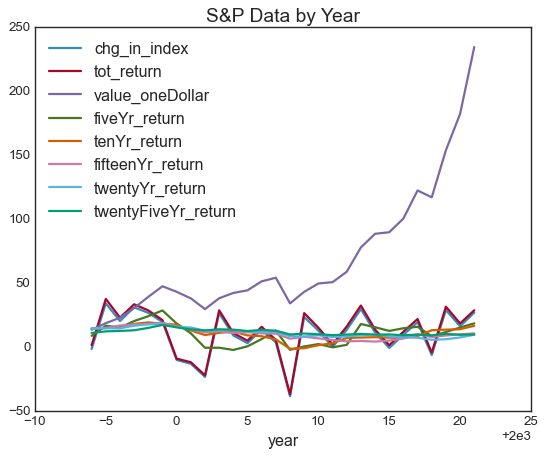

<Figure size 640x480 with 0 Axes>

In [99]:
plt.style.use('seaborn-white')
df2.plot.line(x = 'year')
plt.title('S&P Data by Year')
plt.show()
plt.savefig('sp_data')

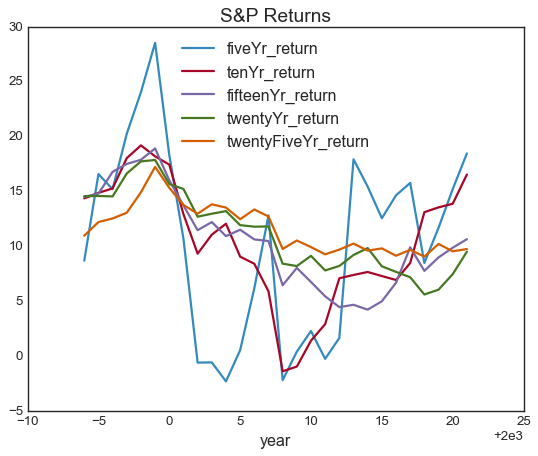

<Figure size 640x480 with 0 Axes>

In [101]:
df2.plot.line(x = 'year', y = df2.columns[4:])
plt.title('S&P Returns')
plt.show()
plt.savefig('sp_data')